In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numba import njit
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [4]:
@njit
def probability_of_intersection(L, D, num_trials=100_000_000):
    theta = np.random.uniform(0, np.pi + 1e-4, num_trials)
    x = np.random.uniform(0, D + 1e-4, num_trials)
    num_intersect = np.sum(x <= (L * np.sin(theta)))
    return num_intersect / num_trials

In [5]:
D = 10
L = 5
P = probability_of_intersection(L, D)
pi_est = (2 * L) / (P * D)
pi_est

3.1419207158300804

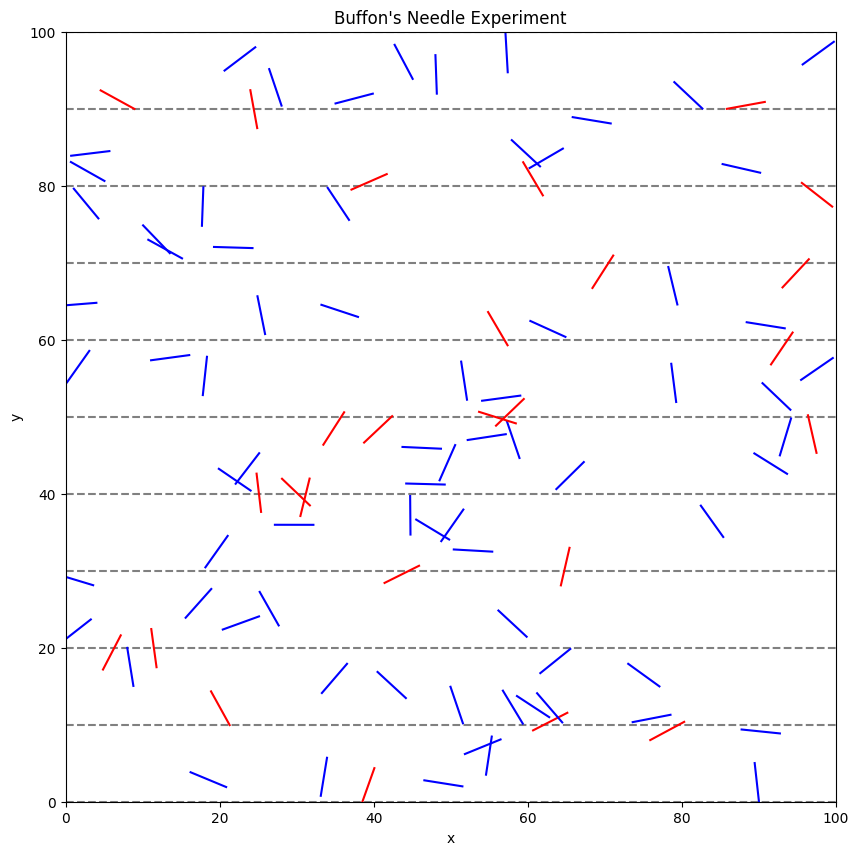

In [46]:
def throw_needles(L, D, num_needles, num_lines):
    # Generate random angles and positions
    theta = np.random.uniform(0, np.pi, num_needles)
    x_center = np.random.uniform(0, D * num_lines, num_needles)
    y_center = np.random.uniform(0, D * num_lines, num_needles)

    # Calculate needle end positions
    x0 = x_center - (L / 2) * np.cos(theta)
    x1 = x_center + (L / 2) * np.cos(theta)
    y0 = y_center - (L / 2) * np.sin(theta)
    y1 = y_center + (L / 2) * np.sin(theta)

    return x0, x1, y0, y1, theta, x_center


def plot_needles(x0, x1, y0, y1, theta, L, D, num_lines=10):
    plt.figure(figsize=(10, 10))

    parallel_lines = np.array([i * D for i in range(num_lines + 1)])
    # Plot the parallel lines
    for l in parallel_lines:
        plt.axhline(l, color="gray", linestyle="--")

    # Plot the needles, highlighting intersections
    bottom_y = np.min([y0, y1], axis=0)
    for i in range(len(x0)):
        d = parallel_lines - bottom_y[i]
        dist_to_nearest_top_line = np.sort(d[d >= 0])[0]
        if dist_to_nearest_top_line <= (L * np.sin(theta[i])):
            plt.plot([x0[i], x1[i]], [y0[i], y1[i]], "r-")
        else:
            plt.plot([x0[i], x1[i]], [y0[i], y1[i]], "b-")

    plt.xlim(0, D * num_lines)
    plt.ylim(0, D * num_lines)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title("Buffon's Needle Experiment")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


# Parameters
D = 10
L = 5
num_needles = 100
num_lines = 10

# Generate needle positions
x0, x1, y0, y1, theta, x_center = throw_needles(L, D, num_needles, num_lines)

# Plot the needles
plot_needles(x0, x1, y0, y1, theta, L, D, num_lines)

In [35]:
np.isclose((L * np.sin(theta)), np.abs(y0 - y1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [31]:
np.abs(y0 - y1)

array([4.78891355, 3.72811195, 4.83914767, 4.96412181, 4.52168244,
       1.26364333, 4.7310624 , 4.98768658, 4.95077636, 4.43288869,
       0.68194011, 3.74712975, 1.33460518, 4.75469491, 2.49725039,
       4.57205953, 1.56573201, 3.9923667 , 0.722894  , 3.3033467 ,
       2.15097009, 4.75802344, 4.96960193, 4.29155549, 2.80469108,
       0.745554  , 2.64911871, 2.43602192, 0.88920979, 4.4451745 ,
       1.72610752, 1.3069275 , 4.7529499 , 4.83130712, 1.34643685,
       2.1472446 , 2.57554596, 4.13911503, 0.06627229, 4.81441346,
       4.17636995, 4.5270808 , 4.58587261, 4.17989618, 4.32669159,
       4.95256549, 4.11737789, 3.9440616 , 4.00940861, 4.95831466,
       3.47932354, 0.86421885, 1.33836102, 4.78486645, 4.88822464,
       3.30613305, 1.4909994 , 3.45865911, 1.93122447, 3.83198362,
       4.97087224, 4.09735568, 3.19538611, 4.80274572, 4.87247756,
       4.81867541, 2.65236111, 2.69574027, 0.4125323 , 4.62609071,
       1.45791001, 4.66622534, 4.63979531, 2.02658648, 1.14494

In [21]:
parallel_lines = np.array([i * D for i in range(num_lines + 1)])
bottom_y = 24.605289390625234
parallel_lines

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [23]:
d = parallel_lines - bottom_y
dist_to_nearest_top_line = np.sort(d[d >= 0])[0]
dist_to_nearest_top_line

5.394710609374766

In [17]:
np.min([y0[0], y1[0]], axis=0)

24.605289390625234